# Ejercicio


![](fig/dos_term_circ.png)


Se conocen los siguientes puntos de la curva de trasnferencia 

|$v_i[V]$|$i_o[mA]$|
|----:|----:|
|0.0  | 0.0 |
|0.05 | 6.035|
|0.222| 13.84|
|0.637|  1.896|


![](fig/dos_term_tras.png)


1.- Para máximo rendimiento obtener: $R$, $V_{pol}$, $V_o$ (Tensión pico sobre la carga) y $P_o$

2.- Potencia disipada por el diodo.

3.- Suponiendo que adoptamos una R de 100 Ohms y Qo=100 determinar el valor de los
elementos reactivos.

4.- Determinar : El valor pico de fundamental de la corriente del diodo (Id1)
Idem para la segunda armónica (Id2)
Idem para la tercera armónica (Id3)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from scipy.fftpack import fft, fftfreq, ifft
from time import time



from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 12,
          'figure.figsize': (8, 8),
         'axes.labelsize': 12,
         'axes.titlesize': 12,
         'xtick.labelsize':12,
         'ytick.labelsize':12}
plt.rcParams.update(params) 



In [2]:
import warnings

x = np.array([0.0,  0.05, 0.222,  0.637])

y = np.array([0.0, 6.035e-3, 13.84e-3,  1.896e-3])

z = np.polyfit(x, y, 3)
p = np.poly1d(z)


xp = np.linspace(0, 1, 100)
yp = p(xp)

print(p)



        3          2
0.3343 x - 0.4302 x + 0.1414 x + 2.317e-17


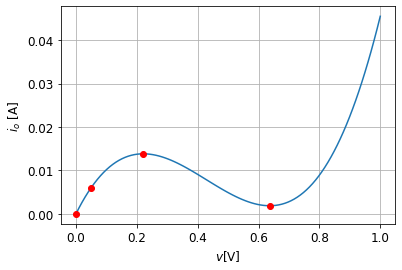

In [3]:
plt.plot(xp, yp)
plt.plot(x,y,'ro')

plt.ylabel('$i_{o}$ [A]')
plt.xlabel('$v$[V]')
plt.grid()
plt.savefig('fig/dos_term_tras.png')
plt.show()

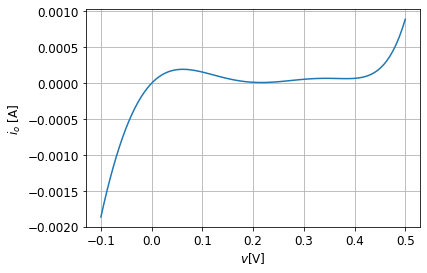

In [7]:
def Id_tunel(V):
    return 0.007358*V-0.08607*V**2+0.2911*V**3+0.03922*V**4-1.693*V**5+2.099*V**6

xp = np.linspace(-0.1, 0.5, 100)
yp = Id_tunel(xp)
plt.plot(xp, yp)


plt.ylabel('$i_{o}$ [A]')
plt.xlabel('$v$[V]')
plt.grid()

plt.show()

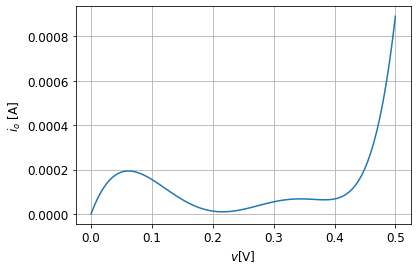

In [5]:
def IDT(v, diode):
    ID = np.sum([d*v**(n) for n,d in enumerate(diode)])
    return ID

  


MBD1057 = [0.0,0.007358,-0.08607,0.291100, 0.039220,-1.69300,2.09900] 
MBD2057 = [0.0,0.011540,-0.12690,0.450900,-0.319000,-1.12400,1.63800]
MBD3057 = [0.0,0.013738,-0.15709,0.546242, 0.076587,-3.55975,4.75774]
MBD4057 = [0.0,0.017188,-0.19620,0.571800, 1.067800,-7.34250,8.82072] 
MBD5057 = [0.0,0.019600,-0.20173,0.483730, 1.599600,-8.45630,9.63780]


xp = np.linspace(0, 0.5, 100)
idt = np.array([IDT(v, MBD1057 ) for v in xp])  
plt.plot(xp, idt )


plt.ylabel('$i_{o}$ [A]')
plt.xlabel('$v$[V]')
plt.grid()

plt.show()